In [2]:
import requests
import pandas as pd
import numpy as np

In [7]:
# import plotly.io as pio
import plotly.express as px
# import plotly.io as pio

In [4]:
url = "https://api.openalex.org/works?group_by=authorships.countries"
r = requests.get(url)

In [5]:
gb_results = r.json()['group_by']

In [10]:
data = []
for item in gb_results:
    if item['key'] == 'unknown':
        continue
    data.append({
        'country_code': item['key'],
        'country': item['key_display_name'],
        'count': item['count'],
    })
country_counts = pd.DataFrame(data)

In [3]:
import country_converter as coco

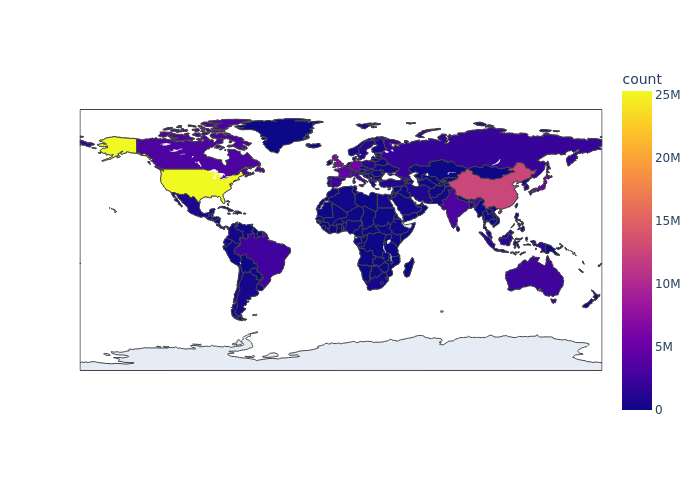

In [11]:
# Get the names of the countries from the country codes
cc = coco.CountryConverter()
# country_counts['country'] = cc.pandas_convert(country_counts['country_code'], to='name_short')
# The Plotly chloropleth method needs the ISO3 (3-letter) country code
country_counts['country_code_ISO3'] = cc.pandas_convert(country_counts['country_code'], to='ISO3')

# Make the map
fig = px.choropleth(country_counts, locations='country_code_ISO3', locationmode='ISO-3', color='count', hover_name='country')
# for an interactive plot, remove the renderer parameter, and just run `fig.show()`
fig.show(renderer='png')